### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 

данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)

с помощью функции train_test_split так, чтобы размер тестовой выборки

составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
    
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans


plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:


boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [3]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [5]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


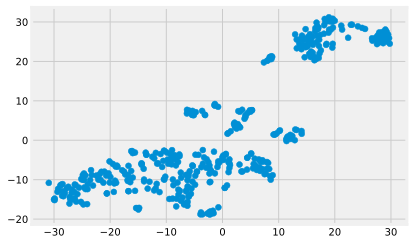

In [6]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,

используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.



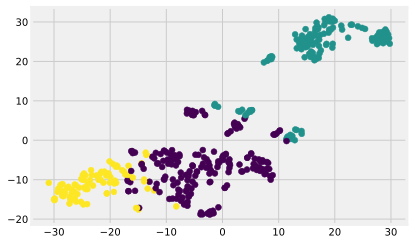

In [7]:

model = KMeans(n_clusters=3, random_state=42, max_iter=100)
groups_train = model.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=groups_train)
plt.show()

In [8]:
y_train[groups_train == 0].mean()

24.971204188481675

In [9]:
print(f"First cluster:\n price - {y_train[groups_train == 0].mean()}\n CRIM - {X_train['CRIM'][groups_train == 0].mean()}")
print(f"Second cluster:\n price - {y_train[groups_train == 1].mean()}\n CRIM - {X_train['CRIM'][groups_train == 1].mean()}")
print(f"Third cluster:\n price - {y_train[groups_train == 2].mean()}\n CRIM - {X_train['CRIM'][groups_train == 2].mean()}")


First cluster:
 price - 24.971204188481675
 CRIM - 0.42098554973821994
Second cluster:
 price - 16.1796875
 CRIM - 10.7152190625
Third cluster:
 price - 27.87411764705882
 CRIM - 0.0721184705882353


### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [14]:
X_test_tsne = tsne.fit_transform(X_test_scaled)


In [15]:
groups_test = model.predict(X_test_scaled)


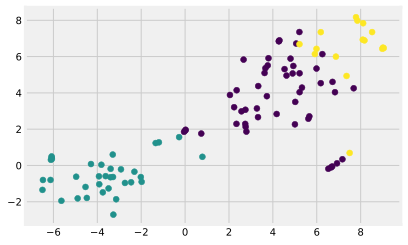

In [16]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=groups_test)
plt.show()

In [19]:
print(f"First cluster:\n price - {y_test[groups_test == 0].mean()}\n CRIM - {X_test['CRIM'][groups_test == 0].mean()}")
print(f"Second cluster:\n price - {y_test[groups_test == 1].mean()}\n CRIM - {X_test['CRIM'][groups_test == 1].mean()}")
print(f"Third cluster:\n price - {y_test[groups_test == 2].mean()}\n CRIM - {X_test['CRIM'][groups_test == 2].mean()}")


First cluster:
 price - 21.860784313725492
 CRIM - 0.2660788235294118
Second cluster:
 price - 16.43714285714286
 CRIM - 10.165531142857143
Third cluster:
 price - 31.35
 CRIM - 0.06206
